## Skin Lesions Dataset Description

The dataset comprises various types of skin lesions, each falling under specific categories:

- **Actinic Keratoses and Intraepithelial Carcinoma / Bowen's Disease (AKIEC)**
- **Basal Cell Carcinoma (BCC)**
- **Benign Keratosis-like Lesions**:
  - *Solar Lentigines*
  - *Seborrheic Keratoses*
  - *Lichen-Planus like Keratoses (BKL)*
- **Dermatofibroma (DF)**
- **Melanoma (MEL)**
- **Melanocytic Nevi (NV)**
- **Vascular Lesions**:
  - *Angiomas*
  - *Angiokeratomas*
  - *Pyogenic Granulomas*
  - *Hemorrhage (VASC)*

**Diagnosis Confirmation:**

- Over 50% of lesions in this dataset are confirmed through **histopathology (Histo)**, serving as the ground truth for these cases.
- For the remaining cases, confirmation methods include:
  - *Follow-up examination (Follow_Up)*
  - *Expert Consensus (Consensus)*
  - *Confirmation by In-Vivo Confocal Microscopy (Confocal)*

Each lesion might have multiple associated images, allowing for tracking via the `lesion_id` column within the `HAM10000_metadata` file.

This diverse dataset contains various types of skin lesions, each categorized and confirmed through different diagnostic approaches, contributing to a comprehensive resource for research and analysis.


In [1]:
# labels_dict = {
#     'akiec': "Actinic Keratoses and Intraepithelial Carcinoma / Bowen's Disease (AKIEC)",
#     'bcc': "Basal Cell Carcinoma (BCC)",
#     'bkl': "Benign Keratosis-like Lesions",
#     'df': "Dermatofibroma (DF)",
#     'mel': "Melanoma (MEL)",
#     'nv': "Melanocytic Nevi (NV)",
#     'vasc': "Vascular Lesions",
#     'histo': "Confirmed through Histopathology (Histo)",
#     'follow_up': "Follow-up examination (Follow_Up)",
#     'consensus': "Expert Consensus (Consensus)",
#     'confocal': "Confirmation by In-Vivo Confocal Microscopy (Confocal)"
# }


In [2]:
# labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

# Imports

In [3]:
import os  
import glob
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix


import PIL 
import random
import numpy as np
import matplotlib.pyplot as plt 

from tool_preprocessing import *

# Preprocessing

In this notebook, labels are initially considered as categorical.

## Manual Part

If the images are organized in the folders of each label, the following flag must be True

In [4]:
flag_folder_sep = False

In [5]:
# base_path = 'C:/Users/lucas/OneDrive - unb.br/Documents/UnB/Semestres-ENE/TCC/COVID_Dataset_original'
base_path = 'C:/Users/lucas/OneDrive - unb.br/Documents/UnB/Semestres-ENE/TCC/The HAM10000 dataset'

In [6]:
if flag_folder_sep :
    label_column = 'label'
    train_df, test_df, val_df  = make_dataset_by_folder(base_path=base_path, label_column=label_column)

else:
    
    path_train_df = f'{base_path}/HAM10000_metadata'
    path_test_df = f'{base_path}/test.csv'
    
    path_train = f"{base_path}/treino"
    path_test = f"{base_path}/test"
    
    paths_image = [path_train, path_test]
    paths_df = [path_train_df, path_test_df]
    label_column = 'dx'
    
    train_df, test_df, val_df = make_dataset_by_df(paths_image, paths_df, label_column=label_column)
    
    

## Analysis

### Train

In [7]:
# image_analysis_train = image_analysis(train_df)

Smallest pixel value: 0

Largest pixel value: 255

Total images processed: 10015

Channel Statistics:
Channel 'R':
  - Average: 194.6979202056175
  - Standard Deviation: 22.85509458222392
Channel 'G':
  - Average: 139.26262746509866
  - Standard Deviation: 30.1684115555478
Channel 'B':
  - Average: 145.4852413568536
  - Standard Deviation: 33.90319049131724

In [8]:
train_df = check_images_existence(train_df, path_column='path')

In [9]:
dict_train_qntd = get_label_counts_and_print(train_df, label_column=label_column)
# shapes_train = analyze_image_shapes(train_df, min_shape=(800, 800), path_column='path')

Total number of images: 9010
Number of unique labels: 7
Label 'nv' has 6034 images.
Label 'mel' has 1001 images.
Label 'bkl' has 989 images.
Label 'bcc' has 462 images.
Label 'akiec' has 294 images.
Label 'vasc' has 127 images.
Label 'df' has 103 images.


In [10]:
dict_train_qntd

{'nv': 6034,
 'mel': 1001,
 'bkl': 989,
 'bcc': 462,
 'akiec': 294,
 'vasc': 127,
 'df': 103}

### Test

In [11]:
# image_analysis_test = image_analysis(test_df)

Smallest pixel value: 0

Largest pixel value: 255

Total images processed: 1511

Channel Statistics:
Channel 'R':
  - Average: 193.96235187636344
  - Standard Deviation: 24.606448726550262
Channel 'G':
  - Average: 141.7550379243572
  - Standard Deviation: 31.9625774054364
Channel 'B':
  - Average: 147.87214814814814
  - Standard Deviation: 35.78649271231254

In [12]:
test_df = check_images_existence(test_df, path_column='path')

Image not found in folder: None
Removed lines:
lesion_id       HAMTEST_0000496
image_id           ISIC_0035068
dx                           nv
dx_type               consensus
age                         NaN
sex                         NaN
localization                NaN
dataset                     NaN
path                       None
Name: 534, dtype: object


In [13]:
dict_test_qntd = get_label_counts_and_print(test_df, label_column=label_column)
# shapes_test = analyze_image_shapes(test_df, min_shape=(461, 601), path_column='path')

Total number of images: 1511
Number of unique labels: 7
Label 'nv' has 908 images.
Label 'bkl' has 217 images.
Label 'mel' has 171 images.
Label 'bcc' has 93 images.
Label 'df' has 44 images.
Label 'akiec' has 43 images.
Label 'vasc' has 35 images.


### Validation

In [14]:
image_analysis_val = image_analysis(val_df)

Smallest pixel value: 0
Largest pixel value: 255
Total images processed: 1005
Channel Statistics:
Channel 'R':
  - Average: 194.84180818500093
  - Standard Deviation: 23.428856516708883
Channel 'G':
  - Average: 139.9250088557214
  - Standard Deviation: 30.539483110296192
Channel 'B':
  - Average: 146.21765087525336
  - Standard Deviation: 34.290640143609394


In [15]:
val_df = check_images_existence(val_df, path_column='path')

In [16]:
dict_val_qntd = get_label_counts_and_print(val_df, label_column=label_column)
# shapes_val = analyze_image_shapes(val_df, min_shape=(461, 601), path_column='path')

Total number of images: 1005
Number of unique labels: 7
Label 'nv' has 671 images.
Label 'mel' has 112 images.
Label 'bkl' has 110 images.
Label 'bcc' has 52 images.
Label 'akiec' has 33 images.
Label 'vasc' has 15 images.
Label 'df' has 12 images.


Average image shape - Height: 450.0, Width: 600.0

Number of images with shape smaller than (461, 601): 1005

Retirar depois

In [17]:
shapes_val = {}
shapes_val['average_height'] = 450
shapes_val['average_width'] = 600

## Model Preparation

In [18]:
from model_preprocessing import *

Passar de categorial para binário 

Pesos para a loss

### Categorial to number

In [19]:
labels_dict = labels2dict(train_df, label_column)
labels_dict

{'nv': 0, 'mel': 1, 'bkl': 2, 'bcc': 3, 'akiec': 4, 'vasc': 5, 'df': 6}

In [20]:
train_label, test_label, val_label = dflabel2number([train_df, test_df, val_df], labels_dict, label_column)

### Weights

In [21]:
if len(labels_dict) == 1:
    weights = calculate_weights(train_df, labels_dict, dict_train_qntd)
    weights = max(weights)
else:
    weights = calculate_weights(train_df, labels_dict, dict_train_qntd)
    print(weights)

[0.21331502438562433, 1.2858570001427145, 1.3014589050989456, 2.7860235003092146, 4.3780369290573375, 10.13498312710911, 12.496532593619973]


# Model

In [22]:
from models import *
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import transforms

c:\Users\Lucas\anaconda3\envs\torch000\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Dataset Class

In [33]:
class CT_Dataset(Dataset):
    def __init__(self, img_path, img_labels, channels, img_transforms=None):
        self.img_path = img_path
        self.img_labels = torch.Tensor(img_labels)
        if channels == 1:
            self.transforms = transforms.Compose([transforms.Grayscale(),
                                                #   transforms.Resize((250, 250)),
                                                  transforms.ToTensor()])
        elif channels == 3:
            self.transforms = transforms.Compose([#transforms.Resize((250, 250)),
                                                  transforms.ToTensor()])
        else:
            self.transforms = img_transforms
    
    def __getitem__(self, index):
        # load image
        cur_path = self.img_path[index]
        cur_img = PIL.Image.open(cur_path).convert('RGB')
        cur_img = self.transforms(cur_img)

        return cur_img, self.img_labels[index]
    
    def __len__(self):
        return len(self.img_path)

## GPU

In [34]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device 

device(type='cuda')

In [35]:
print("Current GPU memory usage:", torch.cuda.memory_allocated() / (1024 ** 2), "MB")
print("Max GPU memory usage:", torch.cuda.max_memory_allocated() / (1024 ** 2), "MB")

torch.cuda.empty_cache()

Current GPU memory usage: 93.92822265625 MB
Max GPU memory usage: 93.92822265625 MB


## Random Seed

In [36]:
random_seed = 124
np.random.seed(random_seed)

torch.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True

## Training

In [37]:
# from train_function import *

In [38]:
try:
    mean_R = image_analysis_val['channel_statistics']['R']['average']
    mean_G = image_analysis_val['channel_statistics']['G']['average']
    mean_B = image_analysis_val['channel_statistics']['B']['average']
    channels = 1 if mean_R == mean_G == mean_B else 3
    
except KeyError:
    channels = image_analysis_val['channels']

In [39]:
train_dataset = CT_Dataset(img_path=np.array(train_df['path']), img_labels=np.array(train_label), channels=channels)
val_dataset = CT_Dataset(img_path=np.array(val_df['path']), img_labels=np.array(val_label), channels=channels)
test_dataset = CT_Dataset(img_path=np.array(test_df['path']), img_labels=np.array(test_label), channels=channels)

In [40]:
from trainer import *

In [41]:
batch_size = 32
Epochs = 10



model_kernel = ResNet50(num_classes=len(labels_dict), input_channels=channels)
# model_kernel = ResNet101(num_classes=len(labels_dict), input_channels=channels)
# model_kernel = EfficientNetB(num_classes=len(labels_dict), input_channels=channels)
# model_kernel = EfficientNetB4(num_classes=len(labels_dict), input_channels=channels)
# model_kernel = EfficientNetB7(num_classes=len(labels_dict), input_channels=channels)
# model_kernel = VGG16(num_classes=len(labels_dict), input_channels=channels)



trainer = ModelTrainer(model_kernel, device, weights, labels_dict, train_dataset, val_dataset, test_dataset, batch_size= batch_size, epochs=Epochs)

In [42]:
trainer.loader()
trainer.loss_function()
trainer.optimizer_step()
print("Training Start:")
for epoch in range(Epochs):
    trainer.model.train()

    trainer.train_loss = 0
    trainer.train_acc = 0

    trainer.train()
    trainer.validate()
    history = trainer.loss_acc()


    print(f"Epoch:{epoch + 1} / {Epochs}, lr: {trainer.optimizer.param_groups[0]['lr']:.5f} train loss:{trainer.train_loss:.5f}, train acc: {trainer.train_acc:.5f}, valid loss:{trainer.val_loss:.5f}, valid acc:{trainer.val_acc:.5f}")
        
    # Update the best model if validation loss is the lowest so far
    if trainer.val_loss < trainer.best_val_loss:
        trainer.best_val_loss = trainer.val_loss
        trainer.best_model_state = trainer.model.state_dict()

    print(f'The best val loss is {trainer.best_val_loss}.\n')
    
    # Load the best model state
    if trainer.best_model_state is not None:
        trainer.model.load_state_dict(trainer.best_model_state)
    model = trainer.model
    
trainer.test()
metrics_df = trainer.metrics()

Training Start:
Epoch:1 / 10, lr: 0.00010 train loss:1.51208, train acc: 0.51662, valid loss:1.01806, valid acc:0.59961
The best val loss is 1.0180602073669434.

Epoch:2 / 10, lr: 0.00010 train loss:1.16839, train acc: 0.59076, valid loss:1.26607, valid acc:0.49219
The best val loss is 1.0180602073669434.

Epoch:3 / 10, lr: 0.00010 train loss:1.06680, train acc: 0.62544, valid loss:1.08100, valid acc:0.65137
The best val loss is 1.0180602073669434.

Epoch:4 / 10, lr: 0.00010 train loss:0.93196, train acc: 0.64262, valid loss:0.78613, valid acc:0.69727
The best val loss is 0.7861342430114746.

Epoch:5 / 10, lr: 0.00010 train loss:0.86900, train acc: 0.64750, valid loss:0.90410, valid acc:0.62891
The best val loss is 0.7861342430114746.

Epoch:6 / 10, lr: 0.00010 train loss:0.75607, train acc: 0.68739, valid loss:0.82100, valid acc:0.67773
The best val loss is 0.7861342430114746.

Epoch:7 / 10, lr: 0.00005 train loss:0.63436, train acc: 0.71243, valid loss:0.86992, valid acc:0.69043
The 

In [43]:
metrics_df = trainer.metrics()

# Metrics

In [44]:
from model_metrics import *

In [45]:
metrics_df

Class  Precision    Recall  F1-Score  Accuracy  True Negatives  \
0     nv   0.769507  0.730642  0.741211  0.730642             539   
1    mel   0.769507  0.730642  0.741211  0.730642            1199   
2    bkl   0.769507  0.730642  0.741211  0.730642            1187   
3    bcc   0.769507  0.730642  0.741211  0.730642            1380   
4  akiec   0.769507  0.730642  0.741211  0.730642            1456   
5   vasc   0.769507  0.730642  0.741211  0.730642            1471   
6     df   0.769507  0.730642  0.741211  0.730642            1427   

   specificity  sensitivity  False Positives  False Negatives  True Positives  
0     0.893864     0.783040               64              197             711  
1     0.894776     0.707602              141               50             121  
2     0.917311     0.737327              107               57             160  
3     0.973202     0.612903               38               36              57  
4     0.991826     0.255814               12               32              11  
5     0.996612     0.600000                5               14              21  
6     0.972733     0.522727               40               21              23

In [ ]:
if flag_folder_sep:
    results_path = f"C:/Users/Lucas/medical_images_models/results_COVID/Model_{model.get_name()}__Epoch_{Epochs}__Batch_{batch_size}__Accuracy_{metrics_df['Accuracy'][0]}"

else:
    results_path = f"C:/Users/Lucas/medical_images_models/results_HAM/Model_{model.get_name()}__Epoch_{Epochs}__Batch_{batch_size}__Accuracy_{metrics_df['Accuracy'][0]}"

In [59]:
# f'results_HAM/Model_{model.get_name()}__Epoch_{Epochs}__Batch_{batch_size}__Accuracy_{metrics_df["Accuracy"][0]}.pth'

metrics_df.to_csv(f'{results_path}.csv', index=False)

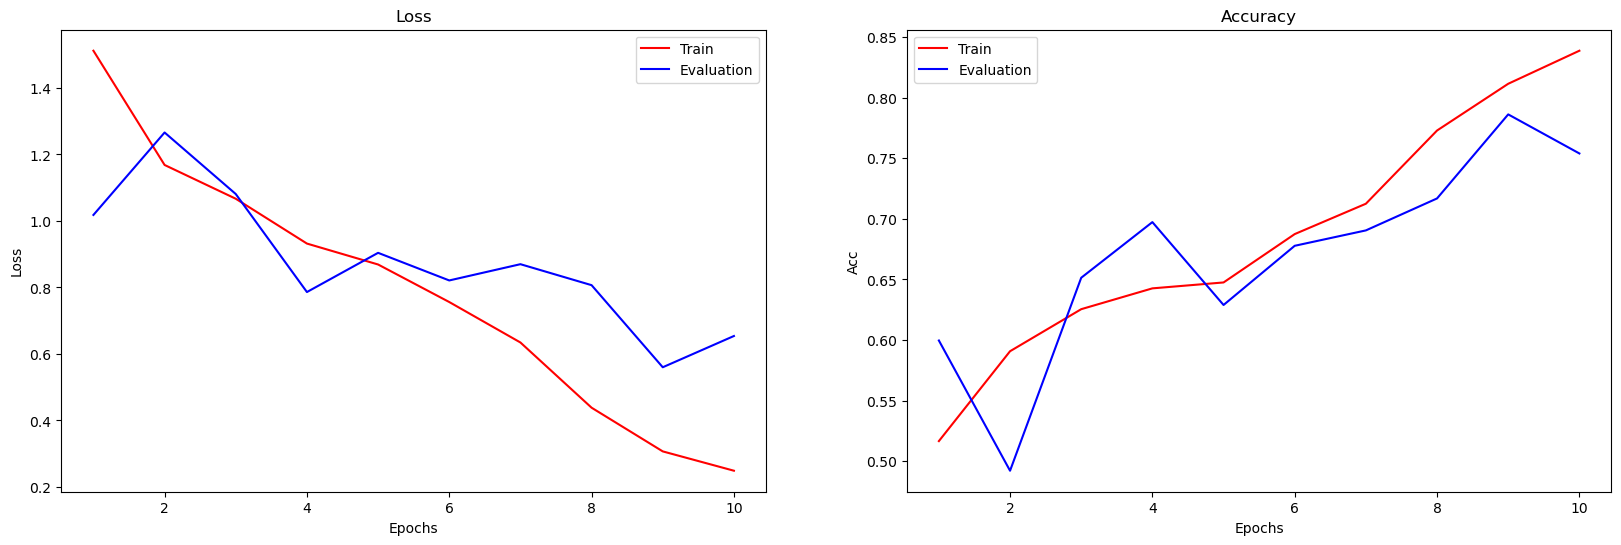

In [60]:
plot_metrics(history, path=results_path)

## Plot Images - True Predicted

In [61]:
inverted_labels_dict = {value: key for key, value in labels_dict.items()}
inverted_labels_dict

{0: 'nv', 1: 'mel', 2: 'bkl', 3: 'bcc', 4: 'akiec', 5: 'vasc', 6: 'df'}

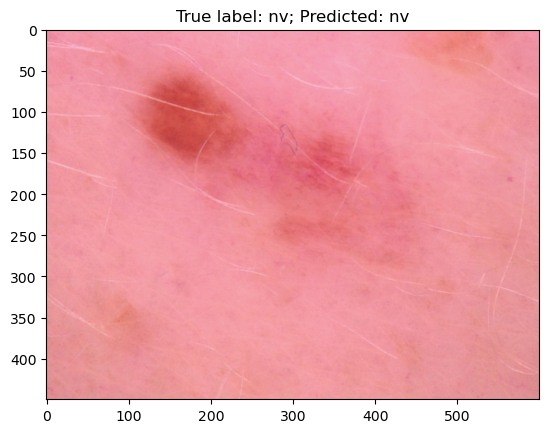

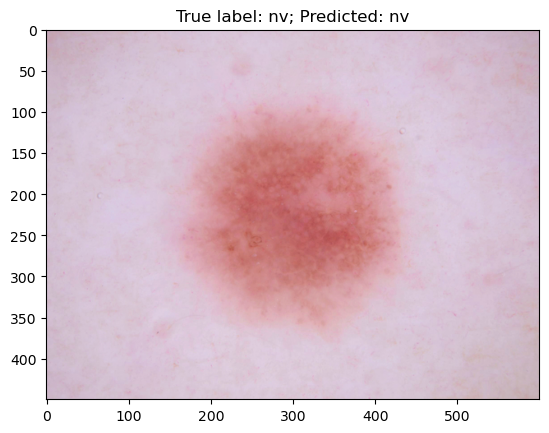

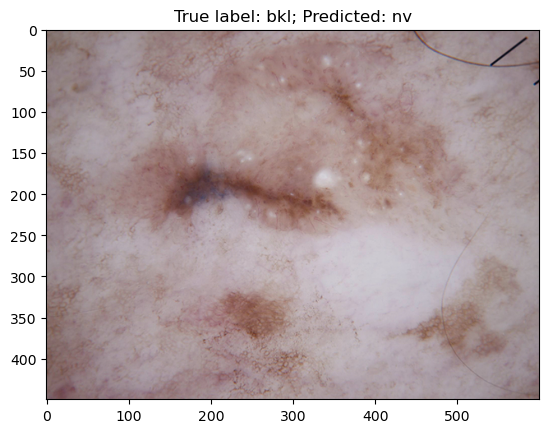

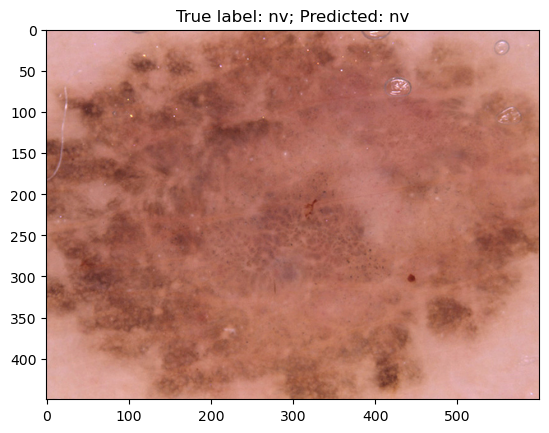

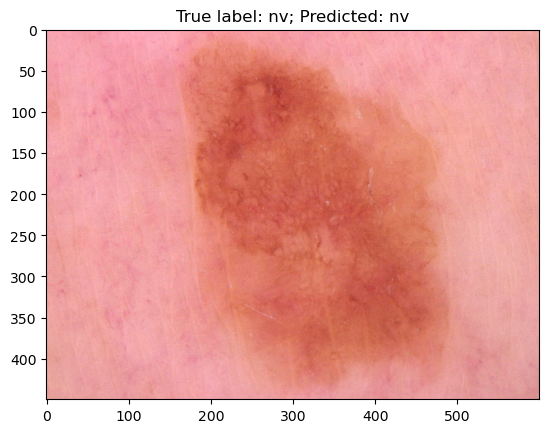

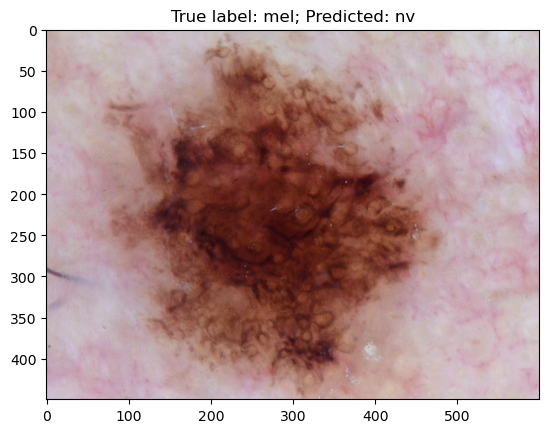

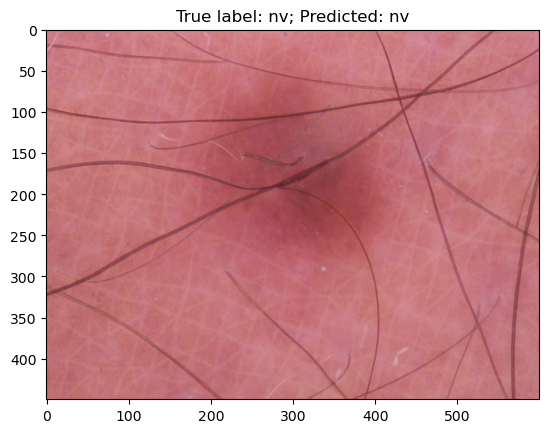

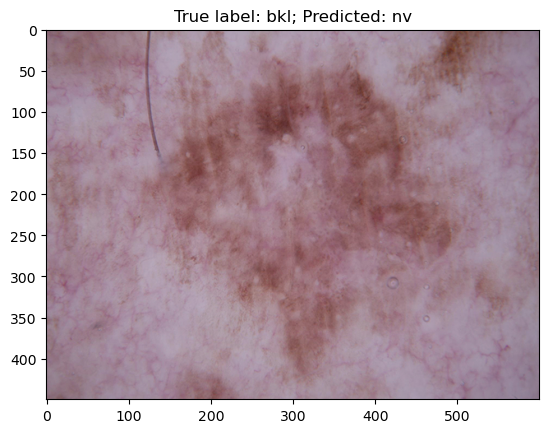

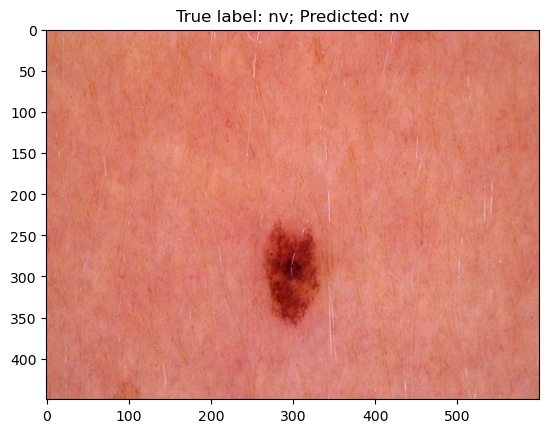

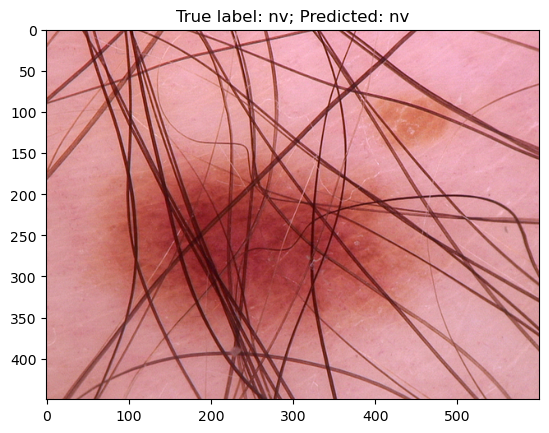

In [62]:
plot_image_pred_true(model, test_dataset, device, inverted_labels_dict, num_images_to_plot=10, plot_images=True)

# Save Model

In [64]:
torch.save(model.state_dict(), f'{results_path}.pth')